In [14]:
#pip install textblob
#pip install spacy
#pip install afinn
#pip install wordcloud

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [15]:
# File paths
cleaned_tweet_file=os.path.join("..","Resources","data","tweetCleandata.csv")

In [16]:
# Load tweet csv file
tweet_df= pd.read_csv(cleaned_tweet_file)

In [18]:
# Display results - we will be using predTweet column to predict the sentiment
tweet_df.head()

,Date,Matched Keywords,User,Source,Followers,Friends,Favorite,Tweet,predTweet,CleanedTweet
0,08/05/2020,Biden,YourSiteingGoog,IFTTT,84,198,0,Breaking #FoxNews Alert : Bien scraps plans to...,breaking foxnews alert biden scraps plans trav...,"['break', 'foxnew', 'alert', 'bien', 'scrap', ..."
1,08/05/2020,Trump,rbenton75nc,Twitter for Android,15,87,0,@JRubinBlogger Isn't the doctor who gave Trump...,not the doctor who gave trump the test the sam...,"['doctor', 'trump', 'test', 'doctor', 'tri', '..."
2,08/05/2020,Trump,Mrb18101,Twitter for iPhone,72,134,0,@WindsorMann The only friends Trump has had hi...,the only friends trump has had his entire life...,"['friend', 'trump', 'entir', 'life', 'one', 'b..."
3,08/05/2020,Trump,mermansteve,Twitter Web App,5232,5664,0,Trump’s pick to manage public lands has four-d...,trumps pick manage public lands has fourdecade...,"['trump', 'pick', 'manag', 'public', 'land', '..."
4,08/05/2020,Trump,biospherian,Twitter Web App,26,167,0,Because Trump is an asshole: http://t.co/Is5rk...,because trump an asshole,"['trump', 'asshol']"


### Method 1: VADER Sentiment Analysis:
- VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the MIT License[http://choosealicense.com/] 

In [19]:
import spacy
from vaderSentiment import vaderSentiment

In [20]:
# Load the English language model from spaCy
english = spacy.load("en_core_web_sm")

In [21]:
analyzer = vaderSentiment.SentimentIntensityAnalyzer()

In [55]:
def getSentiment(text):
    result = english(text)
    sentences = [str(s) for s in result.sents]
    sentiment = [analyzer.polarity_scores(str(s)) for s in sentences]  
    if sentiment[0]['compound'] > 0:
        return "Positive"
    elif sentiment[0]['compound'] < 0:
        return "Negative"
    else:
        return "Neutral"

In [56]:
# Get predictions
tweet_df['Prediction']=tweet_df['predTweet'].apply(lambda x: getSentiment(x))

In [58]:
pd.set_option('display.max_colwidth', 150)

In [59]:
# Display results
tweet_df[['Matched Keywords','predTweet','Prediction']]

,Matched Keywords,predTweet,Prediction
0,Biden,breaking foxnews alert biden scraps plans travel milwaukee for nomination acceptance citing coronavirus concerns,Positive
1,Trump,not the doctor who gave trump the test the same doctor that he tried put as head of the va quid professional quo,Neutral
2,Trump,the only friends trump has had his entire life are they ones that can only be bought with money trump would make terrible friend,Positive
3,Trump,trumps pick manage public lands has fourdecade history of overt racism toward native people by,Negative
4,Trump,because trump an asshole,Neutral
...,...,...,...
59586,Biden,this an attempt siphon votes from joe biden kayne no friend poc will never put another penny in his pocket or anyone associated with him republica...,Neutral
59587,Trump,covid boris johnson trump climate crisis and the various religions fighting each other pretty sure the end of civilization as we know it feels pre...,Negative
59588,Trump,trump thing isnt he when will he finally just go away like things go away,Positive
59589,Trump,oh yea trump god bless america and all its military and police and every single american who loves god and their country amen,Positive


In [60]:
TrumpTweets=tweet_df[tweet_df['Matched Keywords']=='Trump']
BidenTweets =tweet_df[tweet_df['Matched Keywords']=='Biden']

In [61]:
TrumpCount=len(TrumpTweets['Prediction'])
BidenCount=len(BidenTweets['Prediction'])

In [62]:
# Function to caluclate % of sentiments
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [63]:
# Intital counter for sentiment
positive=0
negative=0
neutral=0

In [64]:
def getSentiments(tag,tweets,count):
    # reset counter for sentiment
    positive=0
    negative=0
    neutral=0
    positive_per=0
    neutral_per=0
    negative_per=0
    
    # Loop through tweets and get sentiment polarity
    for pred in tweets:
        
        if(pred =='Positive'):
            positive+=1
        elif(pred =='Negative'):
            negative+=1
        else:
            neutral+=1
            
    
    positive_per = format(percentage(positive,count),'.2f')
    neutral_per = format(percentage(neutral,count),'.2f')
    negative_per = format(percentage(negative,count),'.2f')

    # Preapre labels
    labels =[f'Positive ({positive:,} tweets) [{str(positive_per)}%]',
             f'Neutral ({neutral:,} tweets) [{str(neutral_per)}%]',
             f'Negative ({negative:,} tweets) [{str(negative_per)}%]']
    # Sizes
    sizes=[positive,neutral,negative]
    # Colors
    colors=['yellowgreen','gold','red']
    
    #Explode
    explode = (0.1, 0, 0)  # explode 1st slice
    
    fig = plt.figure(figsize=[8,8])
    ax = fig.add_subplot(111)
    
    # Draw pie chart to show sentiments for the tweets
    #patches,text=plt.pie(sizes,colors=colors,startangle=90)
    plt.pie(sizes, labels=labels, colors=colors,explode=explode,
            shadow=True, startangle=140, autopct='%1.0f%%', labeldistance=1.2)
    plt.title("How people on reacting on " + tag + " by analyzing " + str(count) + " Tweets")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

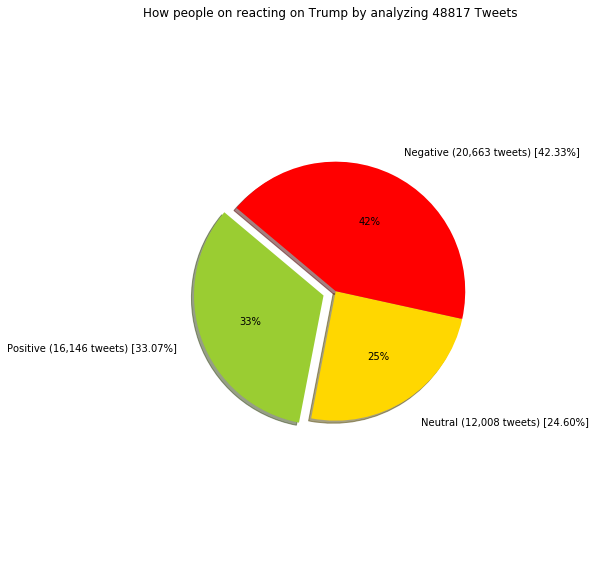

In [65]:
getSentiments("Trump", TrumpTweets['Prediction'],TrumpCount)

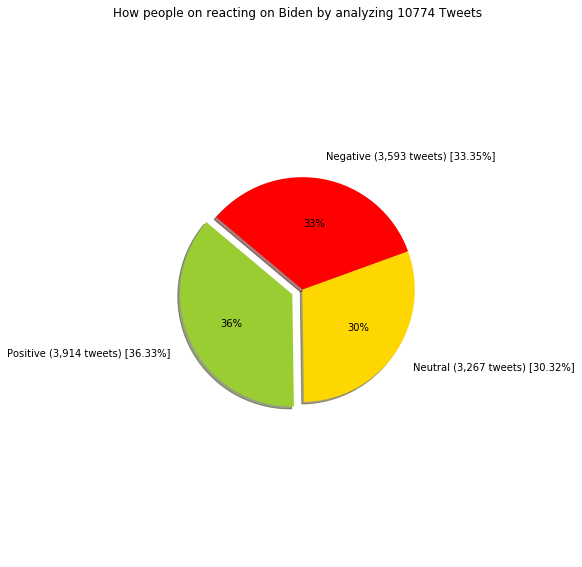

In [66]:
getSentiments("Biden", BidenTweets['Prediction'],BidenCount)

#### We can get a good idea of general sentiment statistics across different tweet categories. Looks like the average sentiment is  negative for Trump and reasonably positive for Biden! 

In [71]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [73]:
tweet_df['encodePrediction'] = labelencoder.fit_transform(tweet_df['Prediction'])

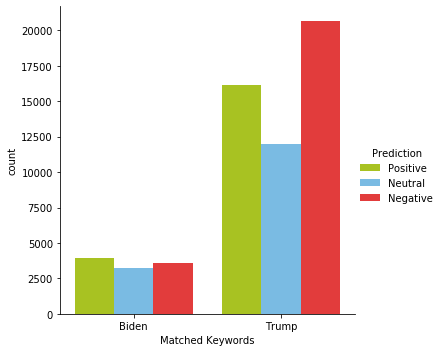

In [84]:
fc = sns.factorplot(x="Matched Keywords", hue="Prediction", 
                    data=tweet_df, kind="count", 
                    palette={"Negative": "#FE2020", 
                             "Positive": "#BADD07", 
                             "Neutral": "#68BFF5"})

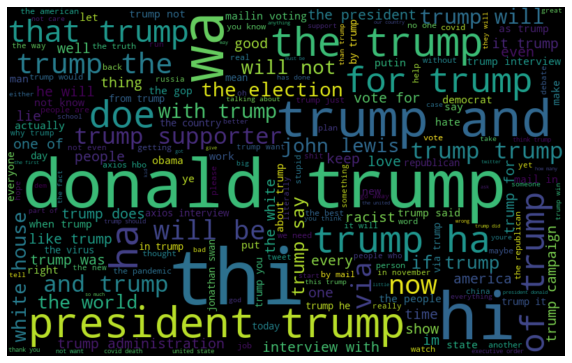

In [95]:
all_words = ' '.join([text for text in TrumpTweets['predTweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=420, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

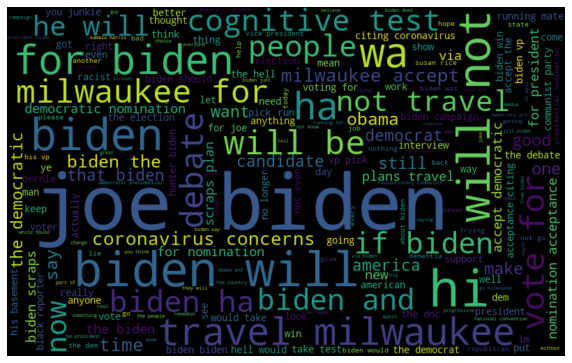

In [96]:
all_words = ' '.join([text for text in BidenTweets['predTweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=420, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()